# Prática — Módulo 2: Processo de Análise Preditiva

### Pergunta
1. Descreva, em uma frase, qual é o objetivo analítico principal deste problema preditivo.

    O objetivo analitico principal é prever uma possível inadinplencia do cliente com base em dados históricos

2.	Qual é a unidade de análise adotada no dataset?

    A unidade de análise é o histórico do cliente no mês de referência

3.	Qual é a variável-alvo principal e por que ela é coerente com o objetivo?

    A variavel alvo é a coluna inadimplente_prox_mes, pois esta diretamente relacionada ao objetivo que é prever a inadimplencia do cliente


In [2]:
!pip install pandas -q

import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

df = pd.read_csv("dataset_inadimplencia_estendido.csv", engine="python")

df.head(20)


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: C:\Users\Alunos\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


,id_cliente,mes_referencia,idade,renda_mensal,tempo_cliente_meses,atrasos_ult_6m,limite_credito,canal,plano,valor_fatura,qtd_faturas_ult_12m,dias_medio_atraso_ult_6m,valor_em_atraso_ult_6m,qtd_cartoes_vinculados,possui_debito_ativo,regiao,tipo_emprego,aceitou_pix,score_risco_interno,inadimplente_prox_mes,inadimplente_prox_3m,cobranca_pos_evento,pagamento_confirmado_prox_mes
0,1,2026-01,56,4728.62,75,1,7890.88,site,basico,82.42,8,3.1,9.80,1,0,SE,CLT,1,0.0308,0,0,0,1
1,2,2026-01,69,2251.00,29,0,2467.44,app,plus,119.88,11,0.0,0.00,3,0,NE,CLT,1,0.0358,0,0,0,1
2,3,2026-01,46,8001.21,36,1,9116.74,site,basico,83.22,9,9.9,42.31,2,0,SE,CLT,1,0.0022,0,0,0,1
3,4,2026-01,32,4223.99,89,1,575.31,loja,plus,113.72,7,2.9,8.08,1,0,SE,desempregado,0,0.0545,0,0,0,1
4,5,2026-01,60,2867.42,21,4,1616.33,app,basico,68.42,6,8.4,23.51,0,1,NE,informal,1,0.2880,1,1,1,0
5,6,2026-01,25,3028.76,36,2,4637.69,app,premium,164.60,7,1.8,5.61,1,0,NE,informal,1,0.0762,0,0,0,1
6,7,2026-01,38,3630.38,10,5,8429.56,loja,basico,87.71,10,11.1,33.54,3,1,CO,CLT,0,0.2040,0,0,0,1
7,8,2026-01,56,3474.31,101,2,5922.60,app,basico,88.73,9,19.6,93.76,2,0,S,informal,0,0.1136,0,1,0,1
8,9,2026-01,36,1200.00,73,0,5160.71,loja,basico,82.32,11,0.0,0.00,2,0,N,informal,0,0.0547,0,0,0,1
9,10,2026-01,40,6774.73,24,3,9365.11,app,basico,75.63,9,2.0,3.76,1,1,S,autonomo,0,0.0455,0,0,0,0


In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     200 non-null    int64  
 1   mes_referencia                 200 non-null    str    
 2   idade                          200 non-null    int64  
 3   renda_mensal                   200 non-null    float64
 4   tempo_cliente_meses            200 non-null    int64  
 5   atrasos_ult_6m                 200 non-null    int64  
 6   limite_credito                 200 non-null    float64
 7   canal                          200 non-null    str    
 8   plano                          200 non-null    str    
 9   valor_fatura                   200 non-null    float64
 10  qtd_faturas_ult_12m            200 non-null    int64  
 11  dias_medio_atraso_ult_6m       200 non-null    float64
 12  valor_em_atraso_ult_6m         200 non-null    float64
 13  q

### Pergunta
4.	Qual campo utiliza informação que só estaria disponível no futuro do ponto de decisão, mesmo não sendo causado diretamente pelo evento? Explique por que isso caracteriza violação temporal.

In [27]:
# Este comando cria uma tabela cruzada entre duas variáveis.
# Em termos estatísticos, ele mostra a distribuição conjunta das duas variáveis.
pd.crosstab(
    df["inadimplente_prox_mes"],
    df["pagamento_confirmado_prox_mes"],
    normalize="all"
)

pagamento_confirmado_prox_mes,0,1
inadimplente_prox_mes,,
0,0.035,0.91
1,0.055,0.00


In [28]:
# Mede o quanto cobranca_pos_evento acompanha o alvo.
# Valores próximos de 1 indicam que a variável praticamente antecipa a resposta.
df["inadimplente_prox_mes"].corr(df["pagamento_confirmado_prox_mes"])

np.float64(-0.7671227843410335)

### Pergunta
5.	Qual campo é registrado como consequência direta do evento e, por isso, introduz vazamento de dados ao carregar o próprio resultado? Explique o impacto disso na avaliação do modelo.

In [6]:
# Mostra a distribuição conjunta entre alvo e cobranca_pos_evento, tornando explícitas todas as combinações possíveis.
pd.crosstab(
    df["inadimplente_prox_mes"],
    df["cobranca_pos_evento"],
    normalize="all"
)

cobranca_pos_evento,0,1
inadimplente_prox_mes,,
0,0.945,0.000
1,0.000,0.055


In [7]:
# Mede o quanto cobranca_pos_evento acompanha o alvo;
# valores próximos de 1 indicam que a variável praticamente antecipa a resposta.
df["inadimplente_prox_mes"].corr(df["cobranca_pos_evento"])

np.float64(1.0)

### Pergunta
6.	Identifique um atributo que funcione como proxy (circularidade) em relação ao alvo e explique por que isso distorce o problema.

In [8]:
# Compara a média do score entre inadimplentes e não inadimplentes.
# Se o score já for maior no grupo inadimplente, ele já está “separando” o alvo,
# indicando que a variável pode ter sido construída a partir do próprio risco (proxy).
df.groupby("inadimplente_prox_mes")["score_risco_interno"].mean()

inadimplente_prox_mes
0    0.047230
1    0.113518
Name: score_risco_interno, dtype: float64

### Pergunta
7. A comparação entre médias é suficiente para concluir que uma variável distingue adequadamente os grupos? Que tipo de limitação essa abordagem pode ter e que outra forma de análise poderia ser utilizada para investigar a distribuição dos valores entre os grupos?


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: C:\Users\Alunos\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


<Axes: title={'center': 'score_risco_interno'}, xlabel='inadimplente_prox_mes'>

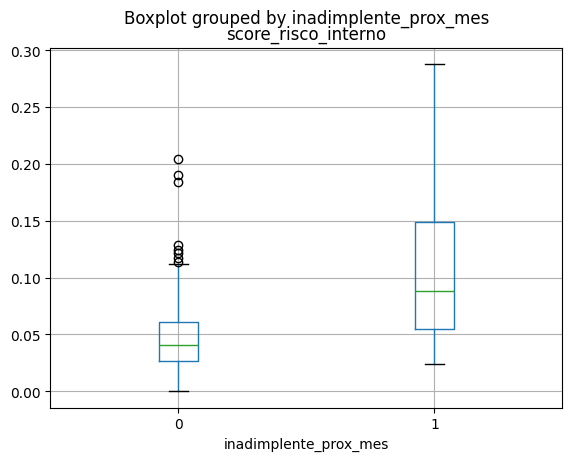

In [10]:
!pip install matplotlib -q

# Visualiza a distribuição do score em cada grupo.
# Uma separação clara entre as caixas indica que a variável já distingue o resultado,
# sugerindo circularidade (o modelo não aprenderia — apenas repetiria o score).
df.boxplot(column="score_risco_interno", by="inadimplente_prox_mes")

### Pergunta
8.	Escolha um atributo com baixa relação causal plausível com inadimplência e justifique por que ele tende a ser irrelevante.

In [11]:
# Verifica se a variável traz variação real ou se é constante; atributos constantes não têm poder explicativo para predição.”# E dedicação de valor constante
df["mes_referencia"].value_counts()

mes_referencia
2026-01    200
Name: count, dtype: int64

In [26]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, minimal=True)
profile

ModuleNotFoundError: No module named 'pkg_resources'